In [1]:
!pip install python-igraph
!pip install pycairo
!pip install pandas
!pip install networkx[default]


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import csv 
import pandas as pd
from igraph import *
import cairo
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 240
Data columns (total 15 columns):
BSSID               215 non-null object
 First time seen    215 non-null object
 Last time seen     215 non-null object
 channel            215 non-null object
 Speed              215 non-null object
 Privacy            215 non-null object
 Cipher             215 non-null object
 Authentication     215 non-null object
 Power              215 non-null object
 # beacons          215 non-null object
 # IV               215 non-null object
 LAN IP             215 non-null object
 ID-length          215 non-null object
 ESSID              215 non-null object
 Key                215 non-null object
dtypes: object(15)
memory usage: 26.9+ KB


In [40]:
path = "samples_adriano/myOutput5G-01.csv" # Path to the .csv file

with open(path) as file:
    table = csv.reader(file)
    rows  = list(table)[1:] # Step to remove st empty row
    aps   = []
    
    for data in rows:
        if not data: 
            break
        
        aps.append(data)

df = pd.DataFrame(aps[1:], columns = rows[0])
# df = df_raw[df_raw[" Power"] != "  -1"].copy()

In [36]:
# Plotting using igraph

graph = Graph()
nodes = len(df) + 1
graph.add_vertices(nodes)

for i in range(nodes):
    graph.vs[i]["id"] = i
    
    if i == 0:
        graph.vs[i]["label"] = "My PC"
        graph.vs[i]["color"] = "red"
        
    else:
        ap_mac   = df.iloc[i - 1, 0]
        ap_ESSID = df.iloc[i - 1, -2]
        
        graph.vs[i]["label"] = (ap_mac, ap_ESSID)
        graph.vs[i]["color"] = "blue"
        
edges = []
for i in range(nodes - 1):
    edges.append((0, i + 1))

graph.add_edges(edges)

power     = []
node_dist = []

for i in range(len(df)):
    node_dist.append(1 / (int(df.iloc[i, 8]) * -1))
    power.append((int(df.iloc[i, 8]) * -1))
    
graph.es['label']  = power
graph.es['weight'] = node_dist



visual_style = {}
output_name = "graph2.png"

visual_style["bbox"]        = (8000,8000)
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"] = 15
visual_style["edge_show_label"]   = True

my_layout = graph.layout_fruchterman_reingold(weights = graph.es['weight'])
visual_style["layout"] = my_layout

plot(graph, output_name, **visual_style)
print("Plotted")

Plotted


Fig saved


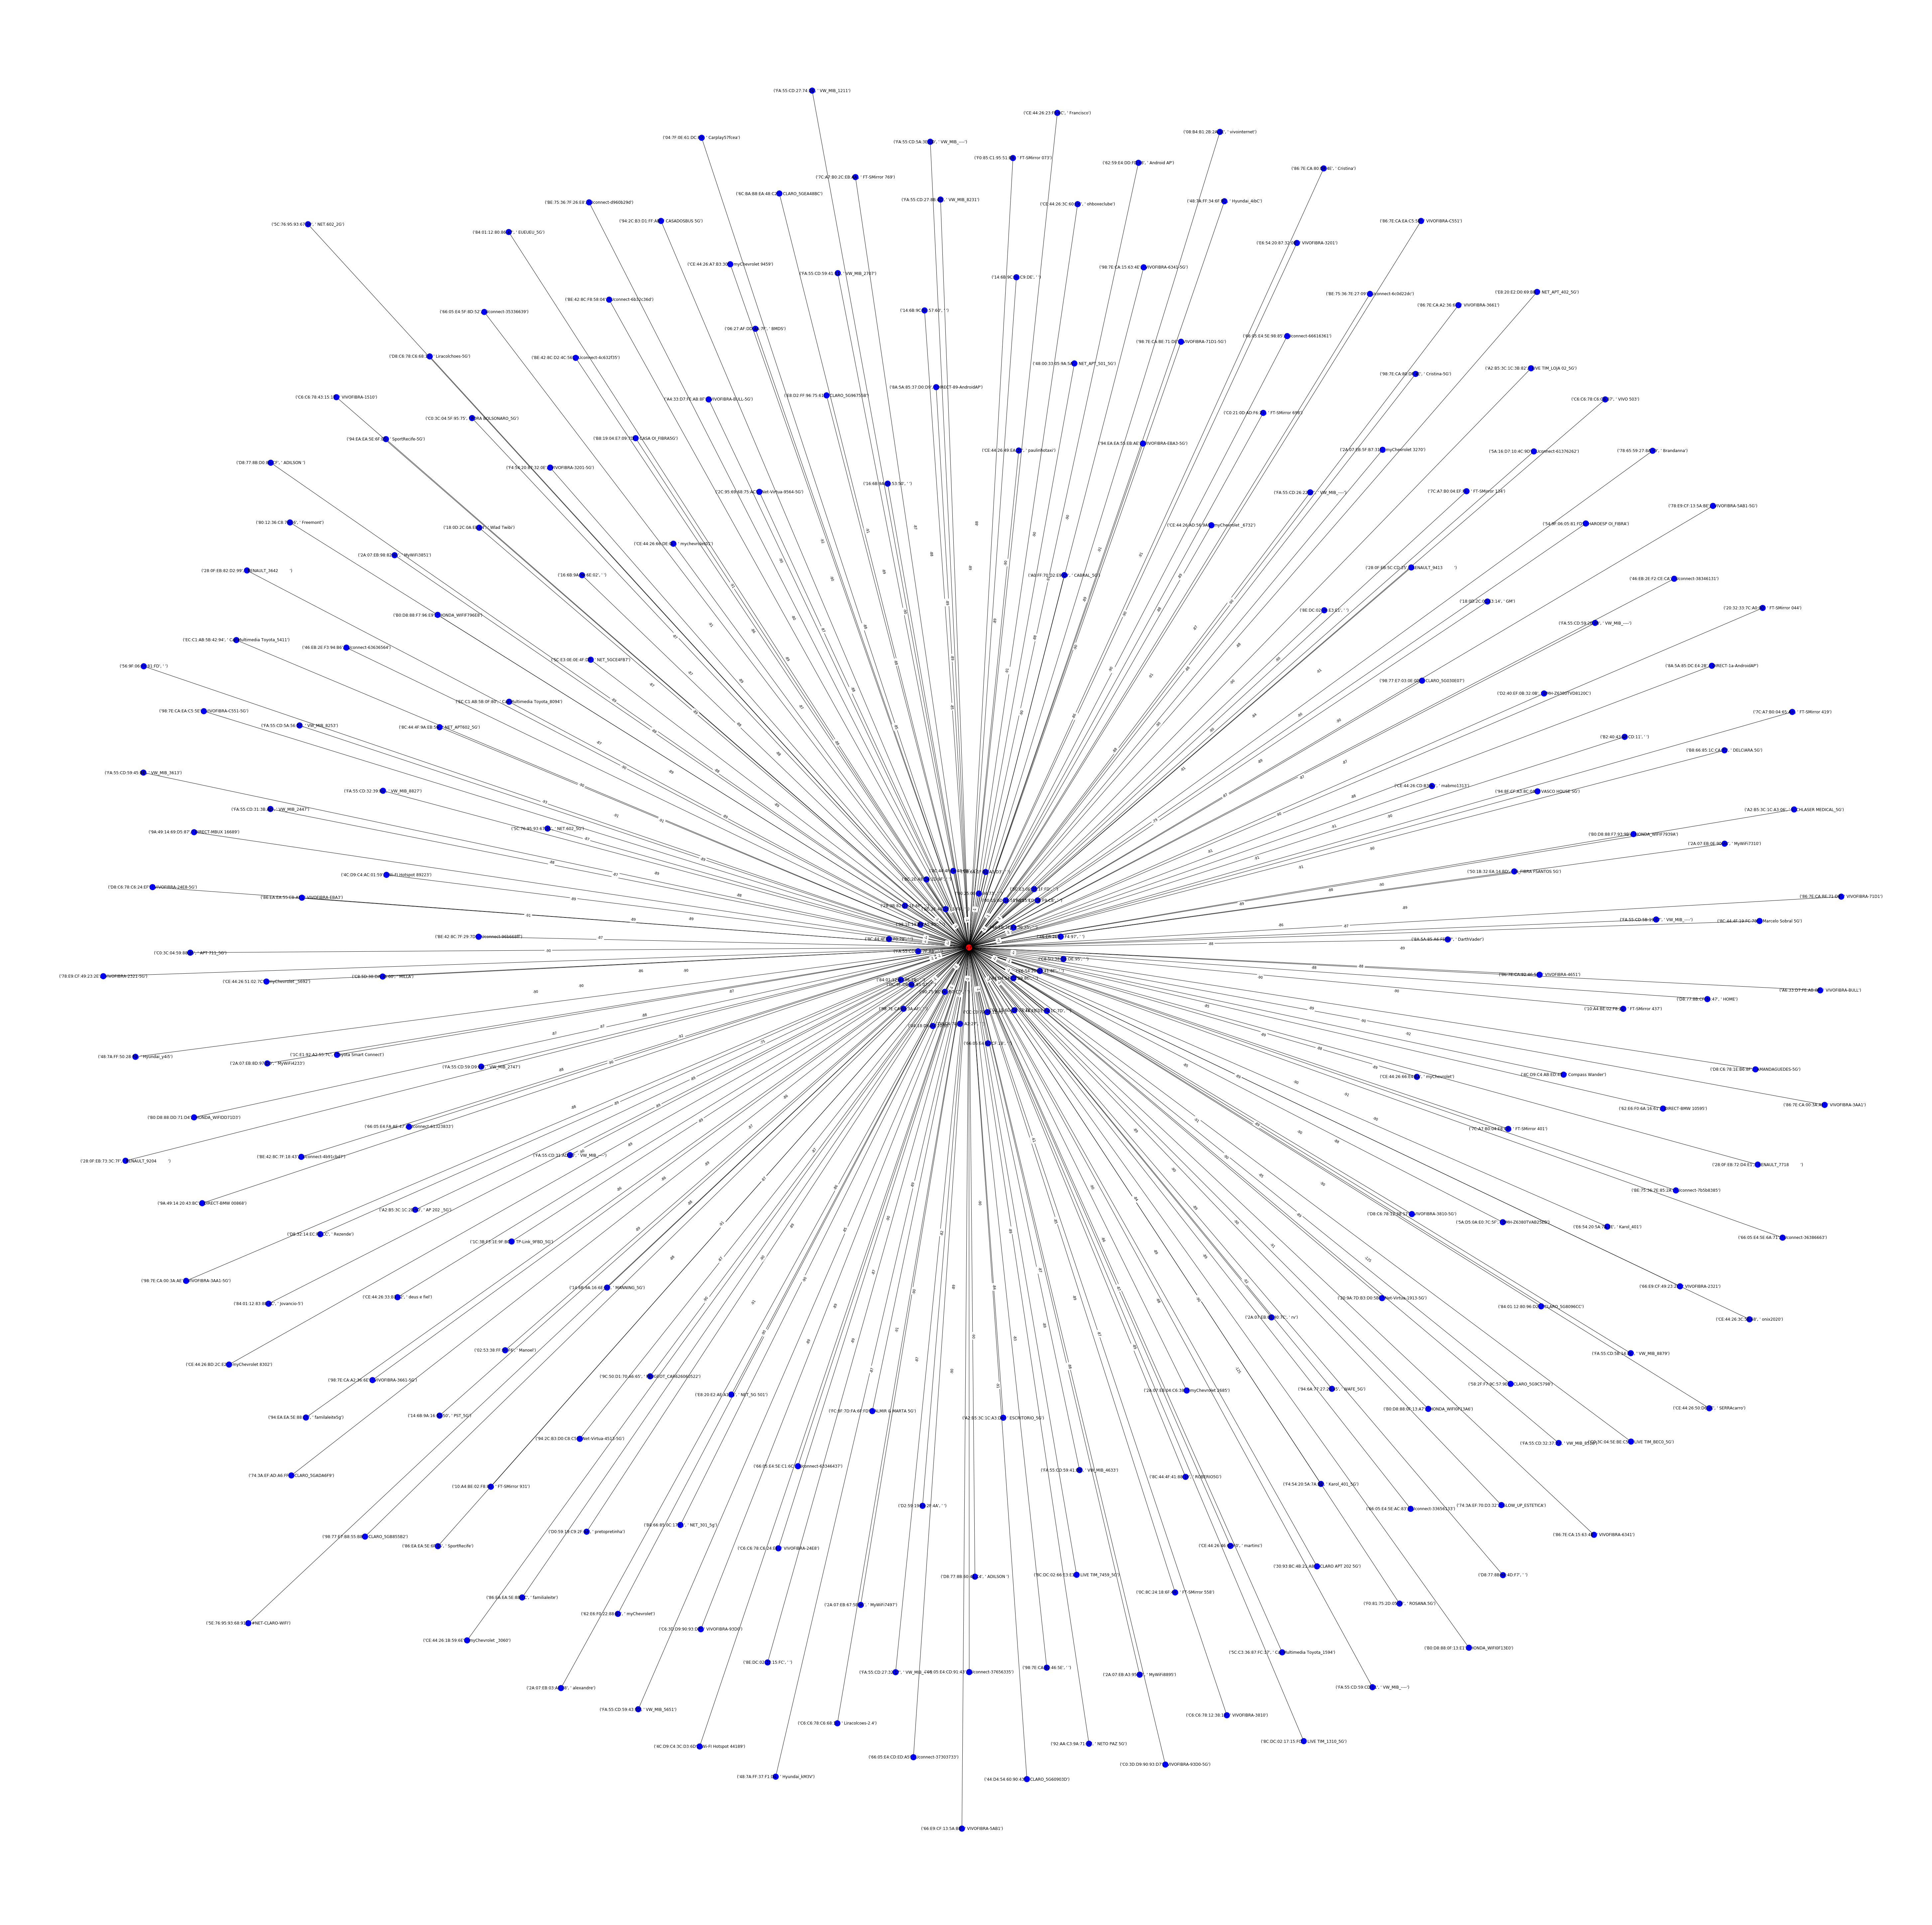

In [41]:
# Plotting using networkX

g = nx.Graph()
nodes = []
labelNodeDict = {}
nodeColor = []
for i in range(len(df)+1):
    if (i==0):
        nodes.append(i)
        labelNodeDict[i] = "My PC"
        nodeColor.append('red')
    else:
        nodes.append(i)
        labelNodeDict[i] = (df.iloc[i-1,0],df.iloc[i-1,-2])
        nodeColor.append('blue')
    
g.add_nodes_from(nodes)

edges = []
labelsEdgeDict = {}
for i in range(len(df)):
    edges.append((0, nodes[i+1], {'weight': (100/(int(df.iloc[i,8])*-1))}))
    labelsEdgeDict[(0,nodes[i+1])] = int(df.iloc[i,8])

g.add_edges_from(edges)

plt.figure(figsize=[80,80])
nx.draw(g, pos=nx.spring_layout(g), labels=labelNodeDict, node_color=nodeColor ,with_labels=True)
nx.draw_networkx_edge_labels(g, pos=nx.spring_layout(g), edge_labels=labelsEdgeDict)
plt.savefig("nx5_1.png")
print("Fig saved")